In [1]:
import matplotlib.pyplot as plt
import matplotlib

import aplpy
import numpy as np
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
import math as m
import scipy.optimize as opt
import statistics as st

matplotlib.rcParams['figure.figsize'] = (15, 7)


In [2]:
hill_data = fits.getdata('fits_files/VelaC_500_hill_regs_regrid_30as_pix.fits', ext = 0)
var_Q_data = fits.getdata('fits_files/VelaC_500_intermediate_regrid_30as_pix_var_Q.fits', ext = 0)
var_U_data = fits.getdata('fits_files/VelaC_500_intermediate_regrid_30as_pix_var_U.fits', ext = 0)
ang_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_ang.fits', ext=0)
I_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_I.fits', ext=0)
p_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_p.fits', ext=0)
polint_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_polint.fits', ext = 0)
Q_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_Q.fits', ext=0)
S_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_S.fits', ext = 0)
s2n_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_s2n_polint.fits', ext = 0)
U_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_U.fits', ext = 0)
var_polint_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_var_polint.fits', ext=0)

# S-corrected p for entire cloud

In [3]:
mask = np.logical_and(hill_data>0, polint_data>3*np.sqrt(var_polint_data))
s = S_data[np.logical_not(np.isnan(S_data))]
s_median = np.logical_and(S_data<st.median(s), mask)

i_good = mask.nonzero()
p_good = p_data[i_good]
s_good = p_data[s_median]

<ipython-input-4-478188562de8>:5: RuntimeWarning: invalid value encountered in arccos
  gammas = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good]
<ipython-input-4-478188562de8>:6: RuntimeWarning: invalid value encountered in arccos
  gammap = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good]


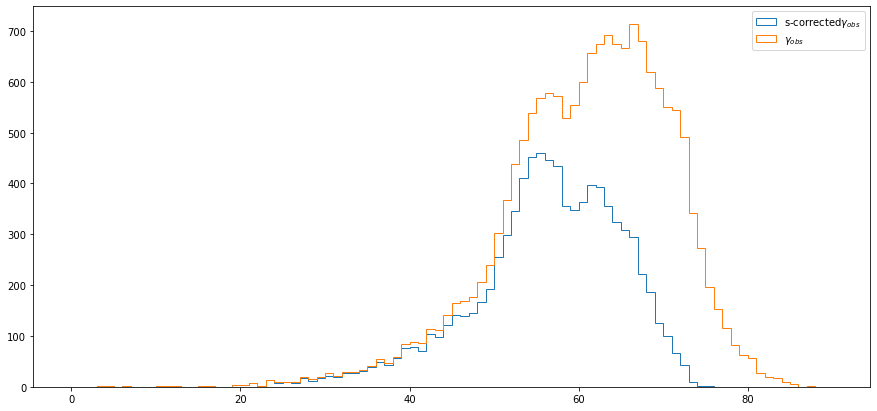

In [4]:
plt.figure(figsize = (15, 7))

p_max = 0.15
p_0 = (3*p_max)/(3+p_max)
gammas = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good]
gammap = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good]

hists, bins, patches = plt.hist(gammas, 90, range= (0,90), histtype = 'step', label = 's-corrected$\gamma_{obs}$')
histp, bins, patches = plt.hist(gammap, 90, range= (0,90), histtype = 'step', label = '$\gamma_{obs}$')

plt.legend()

### Misc 

In [5]:
mask2 = np.logical_and(hill_data==2, polint_data>3*np.sqrt(var_polint_data))
mask3 = np.logical_and(hill_data==3, polint_data>3*np.sqrt(var_polint_data))
mask4 = np.logical_and(hill_data==4, polint_data>3*np.sqrt(var_polint_data))
mask5 = np.logical_and(hill_data==5, polint_data>3*np.sqrt(var_polint_data))

# S-corrected for S mean of each subregion

# 1 Center-Ridge 

6.317666119975689

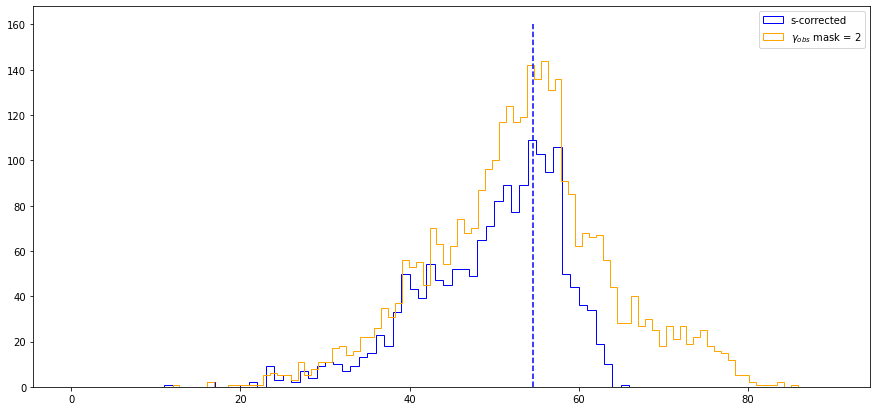

In [6]:
plt.figure(figsize = (15, 7))

s2 = S_data[mask2]
s_median2 = np.logical_and(S_data<st.median(s2), mask2)
s_good2 = p_data[s_median2]
gammas2 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good2]
hists2, bins, patches = plt.hist(gammas2, 90, range= (0,90),  histtype = 'step', label = 's-corrected', color = 'blue')

i_good2 = mask2.nonzero()
p_good2 = p_data[i_good2]
gamma2 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good2]
hist2, bins, patches = plt.hist(gamma2, 90, histtype = 'step', label = '$\gamma_{obs}$ mask = 2', color = 'orange')
plt.legend()

#center for s distribution
y1 = np.linspace(0,160)
x1 = [54.54560399]*len(y1)
plt.plot(x1, y1,'--', color = 'blue')

st.median(s2)

### Gauss parameters, Center-Ridge

array([88.41472846, 54.54560399,  6.09378733])

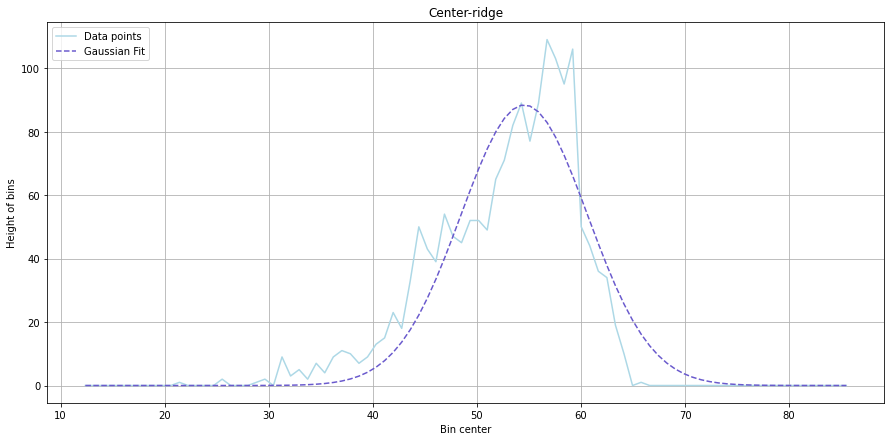

In [7]:
##NOTE: GAUSSIAN PARAMETERS ONLY FOR S-DISPERSON VALUES. DO NOT PLOT FOR P. COMPUTER WILL BLOW UP

gauss2 = np.zeros(len(bins)-1)             #array of zeroes for bincenter

for m in range(len(bins)-1):                  #Loops through all the bins and sets a value for each center on the x axis
    gauss2[m] = (0.5*(bins[m]+bins[m+1]))


def gaussian(x, *p):                                       #defining gaussian function for fit
        return p[0]*np.exp(-1*(x-p[1])**2/(2*p[2]**2)) 

gPar2,gCov2 = opt.curve_fit(gaussian, gauss2, hists2 ,p0=(600 ,60 ,0.2))#fitting the data points

gaussfit2 = gaussian(gauss2, gPar2[0], gPar2[1], gPar2[2])

#plotting the Gaussian fit
plt.plot(gauss2, hists2, '-', color = 'lightblue', label = 'Data points')
plt.plot(gauss2, gaussfit2, '--',color = 'slateblue', label = 'Gaussian Fit')
plt.legend(loc = 'upper left')
plt.title('Gaussian fit')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')
plt.title('Center-ridge')


plt.grid()
gPar2

# 2 Center-Nest

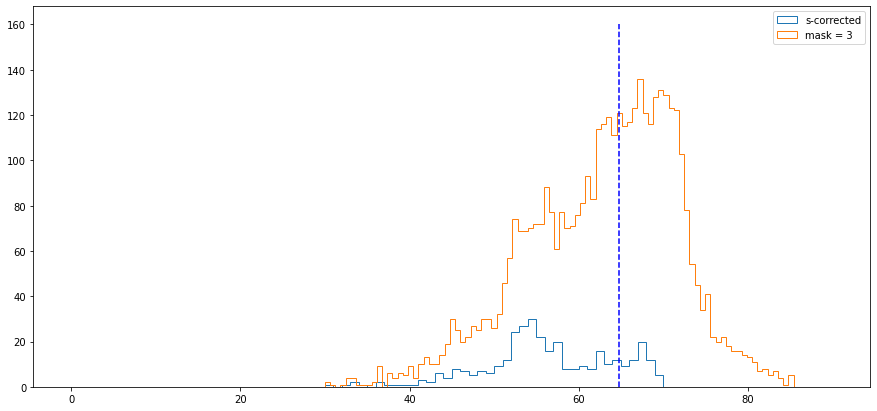

In [8]:
plt.figure(figsize = (15, 7))

s3 = S_data[mask3]

s_median3 = np.logical_and(S_data<st.median(s3), mask3)
s_good3 = p_data[s_median3]
gammas3 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good3]
hists3, bins, patches = plt.hist(gammas3, 90, range= (0,90),  histtype = 'step', label = 's-corrected')

i_good3 = mask3.nonzero()
p_good3 = p_data[i_good3]
gamma3 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good3]
hist3, bins, patches = plt.hist(gamma3, 90, histtype = 'step', label = 'mask = 3')

y3 = np.linspace(0,160)
x3 = [64.78679933]*len(y3)
plt.plot(x3, y3,'--', color = 'blue')

plt.legend()

### :(

array([18.00703372, 64.78679933,  4.75469199])

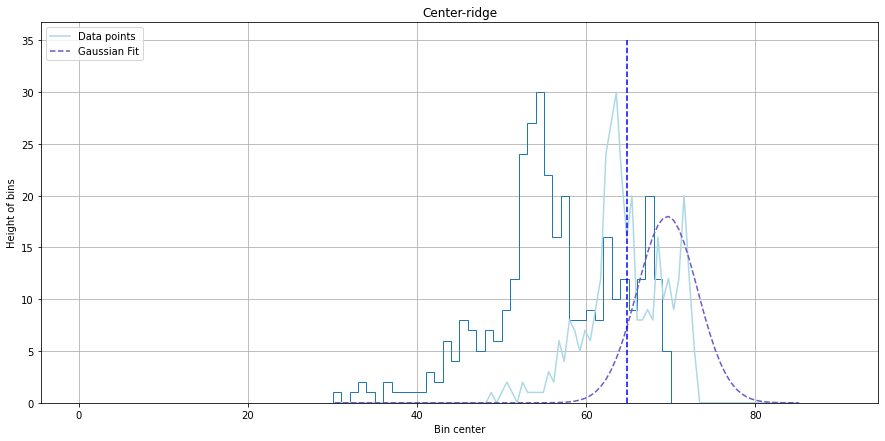

In [9]:
##NOTE: GAUSSIAN PARAMETERS ONLY FOR S-DISPERSON VALUES. DO NOT PLOT FOR P. COMPUTER WILL BLOW UP

gauss3 = np.zeros(len(bins)-1)             #array of zeroes for bincenter

for m in range(len(bins)-1):                  #Loops through all the bins and sets a value for each center on the x axis
    gauss3[m] = (0.5*(bins[m]+bins[m+1]))


def gaussian(x, *p):                                       #defining gaussian function for fit
        return p[0]*np.exp(-1*(x-p[1])**2/(2*p[2]**2)) 

gPar3,gCov3 = opt.curve_fit(gaussian, gauss3, hists3 ,p0=(600 ,60 ,0.2))#fitting the data points

gaussfit3 = gaussian(gauss2, gPar3[0], gPar3[1], gPar3[2])

#plotting the Gaussian fit
plt.plot(gauss3, hists3, '-', color = 'lightblue', label = 'Data points')
plt.plot(gauss3, gaussfit3, '--',color = 'slateblue', label = 'Gaussian Fit')
plt.legend(loc = 'upper left')
plt.title('Gaussian fit')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')
plt.title('Center-ridge')
hists3, bins, patches = plt.hist(gammas3, 90, range= (0,90),  histtype = 'step', label = 's-corrected')



y3 = np.linspace(0,35)
x3 = [64.78679933]*len(y3)
plt.plot(x3, y3,'--', color = 'blue')


plt.grid()
gPar3

# 3 South-Ridge

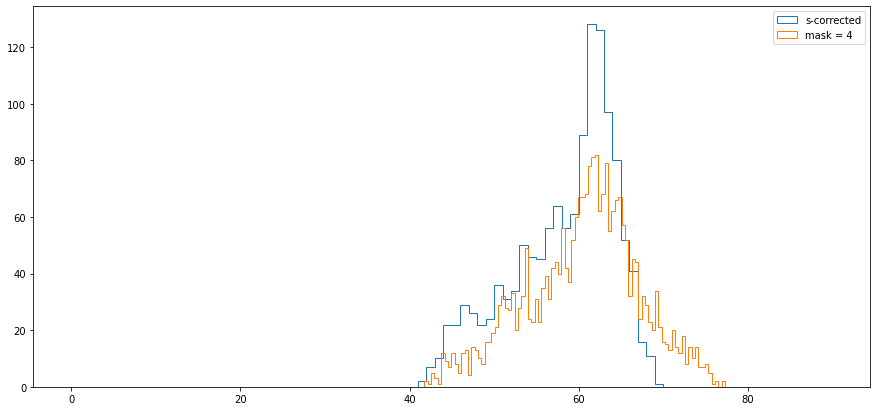

In [10]:
plt.figure(figsize = (15, 7))

s4 = S_data[mask4]
s_median4 = np.logical_and(mask4, S_data<st.median(s4))
s_good4 = p_data[s_median4]
gammas4 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good4]
hists4, bins, patches = plt.hist(gammas4, 90, range= (0,90),  histtype = 'step', label = 's-corrected')

i_good4 = mask4.nonzero()
p_good4 = p_data[i_good4]
gamma4 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good4]
hist4, bins, patches = plt.hist(gamma4, 90, histtype = 'step', label = 'mask = 4')
plt.legend()

# 4 South-Nest

<ipython-input-11-7e0cd1af8a97>:6: RuntimeWarning: invalid value encountered in arccos
  gammas5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good5]
<ipython-input-11-7e0cd1af8a97>:11: RuntimeWarning: invalid value encountered in arccos
  gamma5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good5]


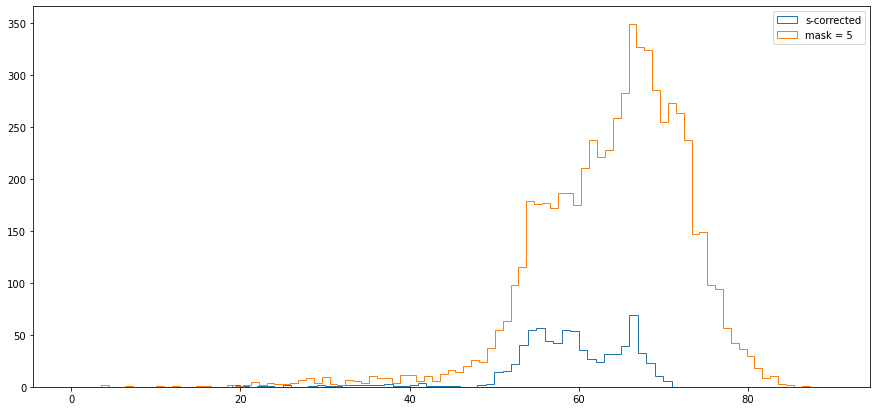

In [11]:
plt.figure(figsize = (15, 7))

s5 = S_data[mask5]
s_median5 = np.logical_and(S_data<st.median(s5), mask5)
s_good5 = p_data[s_median5]
gammas5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good5]
hists5, bins, patches = plt.hist(gammas5, 90, range= (0,90),  histtype = 'step', label = 's-corrected')

i_good5 = mask5.nonzero()
p_good5 = p_data[i_good5]
gamma5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good5]
hist5, bins, patches = plt.hist(gamma5, 90, histtype = 'step', label = 'mask = 5')
plt.legend()

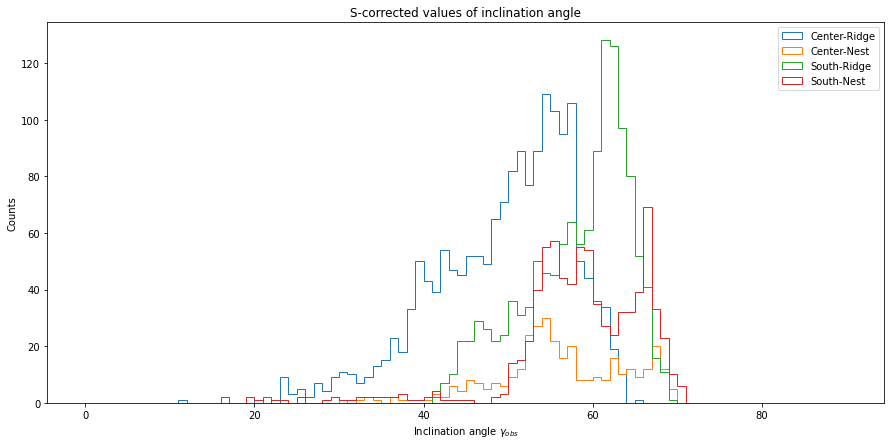

In [12]:
hists2, bins, patches = plt.hist(gammas2, 90, range= (0,90),  histtype = 'step', label = 'Center-Ridge')
hists3, bins, patches = plt.hist(gammas3, 90, range= (0,90),  histtype = 'step', label = 'Center-Nest')
hists4, bins, patches = plt.hist(gammas4, 90, range= (0,90),  histtype = 'step', label = 'South-Ridge')
hists5, bins, patches = plt.hist(gammas5, 90, range= (0,90),  histtype = 'step', label = 'South-Nest')
plt.xlabel('Inclination angle $\gamma_{obs}$')
plt.ylabel('Counts')
plt.title('S-corrected values of inclination angle')
plt.legend()

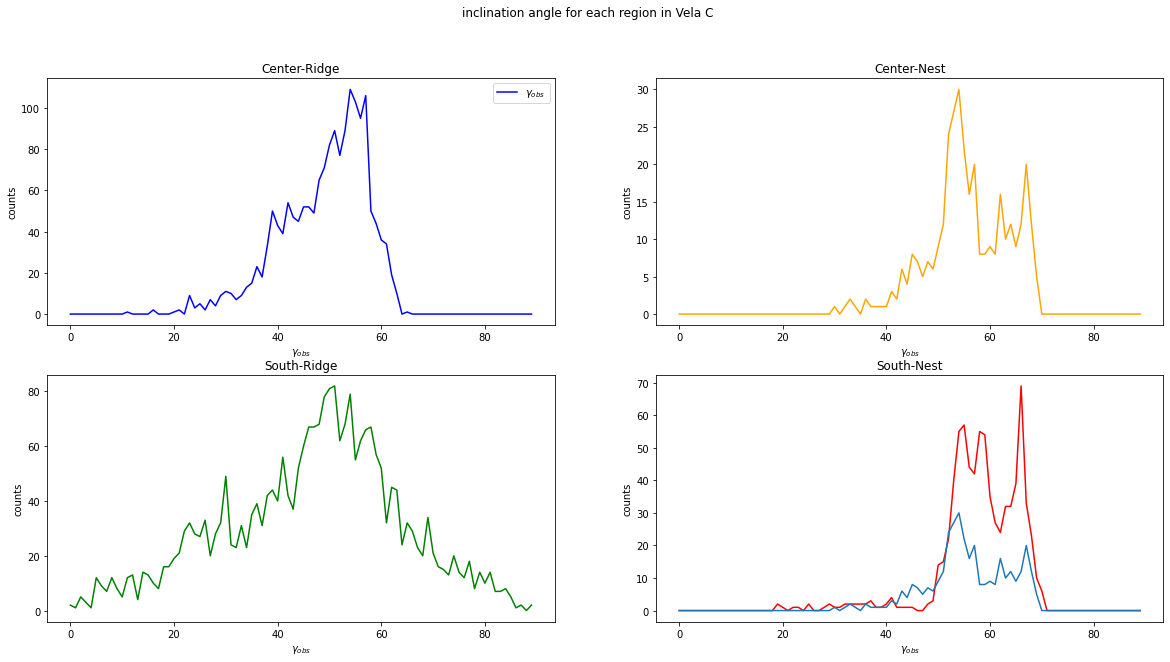